# 패키지 설치 및 임포트

In [ ]:
# 패키지 설치
!pip install pandas numpy scikit-learn matplotlib seaborn

# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# 데이터 불러오기

In [ ]:
# 데이터 불러오기
train_df = pd.read_csv('train.csv')  # train 데이터
test_df = pd.read_csv('test.csv')  # test 데이터
sample_submission = pd.read_csv('sample_submission.csv')  # 제출 형식 파일

# 데이터 구조 확인
print(train_df.info())
print(train_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 69 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     256351 non-null  object 
 1   시술 시기 코드               256351 non-null  object 
 2   시술 당시 나이               256351 non-null  object 
 3   임신 시도 또는 마지막 임신 경과 연수  9370 non-null    float64
 4   시술 유형                  256351 non-null  object 
 5   특정 시술 유형               256349 non-null  object 
 6   배란 자극 여부               256351 non-null  int64  
 7   배란 유도 유형               256351 non-null  object 
 8   단일 배아 이식 여부            250060 non-null  float64
 9   착상 전 유전 검사 사용 여부       2718 non-null    float64
 10  착상 전 유전 진단 사용 여부       250060 non-null  float64
 11  남성 주 불임 원인             256351 non-null  int64  
 12  남성 부 불임 원인             256351 non-null  int64  
 13  여성 주 불임 원인             256351 non-null  int64  
 14  여성 부 불임 원인             256351 non-nu

# 결측치 처리
* 수치형 변수는 중앙값으로, 범주형 변수는 `'Unknown'`으로 대체

In [ ]:
print(train_df.columns)
print(test_df.columns)

Index(['ID', '시술 시기 코드', '시술 당시 나이', '임신 시도 또는 마지막 임신 경과 연수', '시술 유형',
       '특정 시술 유형', '배란 자극 여부', '배란 유도 유형', '단일 배아 이식 여부', '착상 전 유전 검사 사용 여부',
       '착상 전 유전 진단 사용 여부', '남성 주 불임 원인', '남성 부 불임 원인', '여성 주 불임 원인',
       '여성 부 불임 원인', '부부 주 불임 원인', '부부 부 불임 원인', '불명확 불임 원인', '불임 원인 - 난관 질환',
       '불임 원인 - 남성 요인', '불임 원인 - 배란 장애', '불임 원인 - 여성 요인', '불임 원인 - 자궁경부 문제',
       '불임 원인 - 자궁내막증', '불임 원인 - 정자 농도', '불임 원인 - 정자 면역학적 요인',
       '불임 원인 - 정자 운동성', '불임 원인 - 정자 형태', '배아 생성 주요 이유', '총 시술 횟수',
       '클리닉 내 총 시술 횟수', 'IVF 시술 횟수', 'DI 시술 횟수', '총 임신 횟수', 'IVF 임신 횟수',
       'DI 임신 횟수', '총 출산 횟수', 'IVF 출산 횟수', 'DI 출산 횟수', '총 생성 배아 수',
       '미세주입된 난자 수', '미세주입에서 생성된 배아 수', '이식된 배아 수', '미세주입 배아 이식 수', '저장된 배아 수',
       '미세주입 후 저장된 배아 수', '해동된 배아 수', '해동 난자 수', '수집된 신선 난자 수', '저장된 신선 난자 수',
       '혼합된 난자 수', '파트너 정자와 혼합된 난자 수', '기증자 정자와 혼합된 난자 수', '난자 출처', '정자 출처',
       '난자 기증자 나이', '정자 기증자 나이', '동결 배아 사용 여부', '신선 배아 사용 여부', '기증 배아 사용 여부',
       '대리모 여부', 'PGD 시술 여부', 'PGS 시술 여부

In [ ]:
# 결측치 처리
num_cols = train_df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = train_df.select_dtypes(include=['object']).columns

for col in num_cols:
    if col in train_df.columns:  # train 데이터에서 컬럼 존재 여부 확인
        train_df[col] = train_df[col].fillna(train_df[col].median())
    if col in test_df.columns:  # test 데이터에서 컬럼 존재 여부 확인
        test_df[col] = test_df[col].fillna(test_df[col].median())

for col in cat_cols:
    if col in train_df.columns:  # train 데이터에서 컬럼 존재 여부 확인
        train_df[col] = train_df[col].fillna('Unknown')
    if col in test_df.columns:  # test 데이터에서 컬럼 존재 여부 확인
        test_df[col] = test_df[col].fillna('Unknown')

# 범주형 변수 인코딩
* 범주형 변수를 숫자로 변환

In [ ]:
# Label Encoding
for col in cat_cols:
    encoder = LabelEncoder()
    encoder.fit(pd.concat([train_df[col], test_df[col]], axis=0))
    train_df[col] = encoder.transform(train_df[col])
    test_df[col] = encoder.transform(test_df[col])

# EDA (탐색적 데이터 분석)
* 변수 간 분포와 관계를 시각화

In [ ]:
# 데이터 크기 확인
print(f"Train Data Shape: {train_df.shape}")
print(f"Test Data Shape: {test_df.shape}")

# 데이터 요약 정보
print(train_df.info())

# 타겟 분포 확인
print(train_df['임신 성공 여부'].value_counts(normalize=True))

# 결측치 확인
print(train_df.isnull().sum())


Train Data Shape: (256351, 69)
Test Data Shape: (90067, 68)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 69 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     256351 non-null  int64  
 1   시술 시기 코드               256351 non-null  int64  
 2   시술 당시 나이               256351 non-null  int64  
 3   임신 시도 또는 마지막 임신 경과 연수  256351 non-null  float64
 4   시술 유형                  256351 non-null  int64  
 5   특정 시술 유형               256351 non-null  int64  
 6   배란 자극 여부               256351 non-null  int64  
 7   배란 유도 유형               256351 non-null  int64  
 8   단일 배아 이식 여부            256351 non-null  float64
 9   착상 전 유전 검사 사용 여부       256351 non-null  float64
 10  착상 전 유전 진단 사용 여부       256351 non-null  float64
 11  남성 주 불임 원인             256351 non-null  int64  
 12  남성 부 불임 원인             256351 non-null  int64  
 13  여성 주 불임 원인             256351

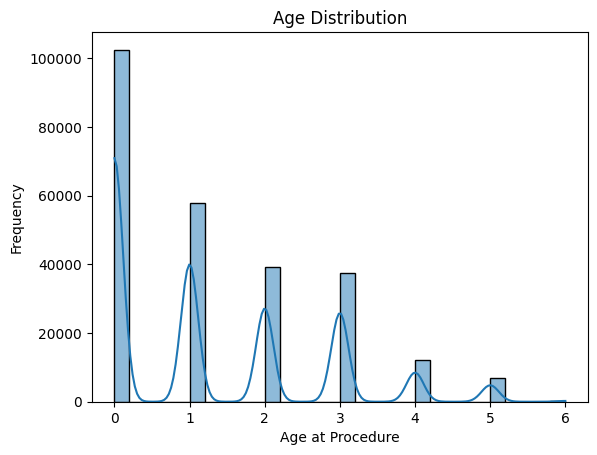

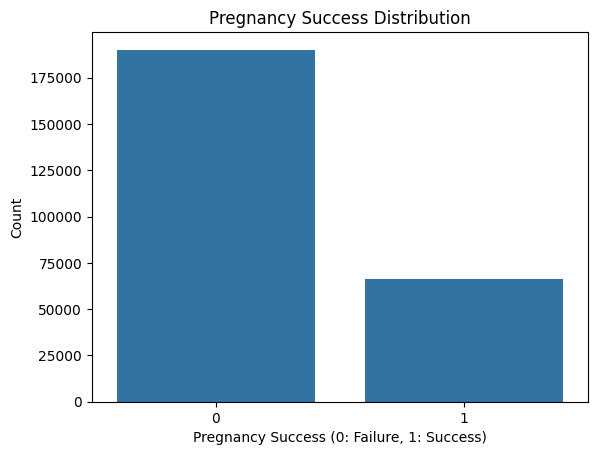

In [ ]:
# 시술 당시 나이 분포
sns.histplot(train_df['시술 당시 나이'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age at Procedure')
plt.ylabel('Frequency')
plt.show()

# 임신 성공 여부 분포
sns.countplot(x='임신 성공 여부', data=train_df)
plt.title('Pregnancy Success Distribution')
plt.xlabel('Pregnancy Success (0: Failure, 1: Success)')
plt.ylabel('Count')
plt.show()


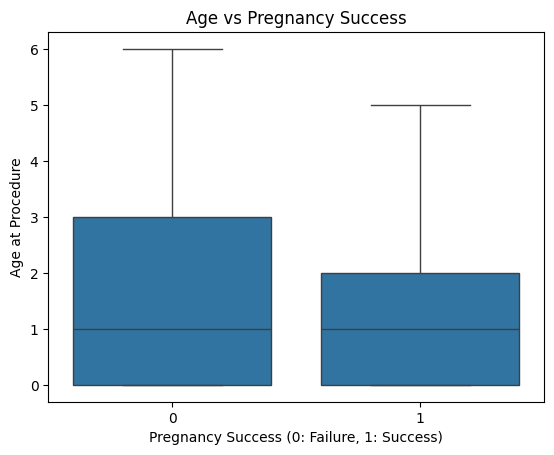

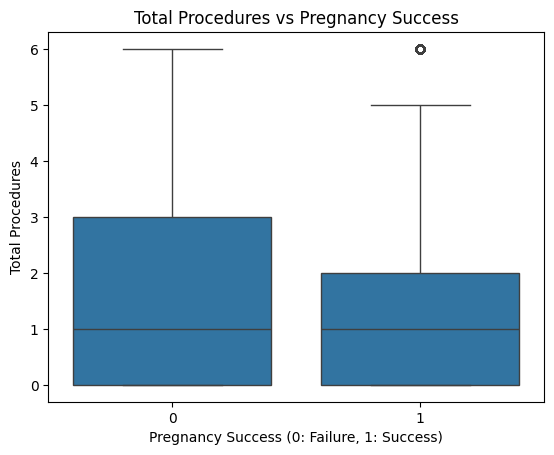

In [ ]:
# 나이와 임신 성공 여부 관계
sns.boxplot(x='임신 성공 여부', y='시술 당시 나이', data=train_df)
plt.title('Age vs Pregnancy Success')
plt.xlabel('Pregnancy Success (0: Failure, 1: Success)')
plt.ylabel('Age at Procedure')
plt.show()

# 총 시술 횟수와 임신 성공 여부 관계
sns.boxplot(x='임신 성공 여부', y='총 시술 횟수', data=train_df)
plt.title('Total Procedures vs Pregnancy Success')
plt.xlabel('Pregnancy Success (0: Failure, 1: Success)')
plt.ylabel('Total Procedures')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49696 (\N{HANGUL SYLLABLE SUL}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/loc

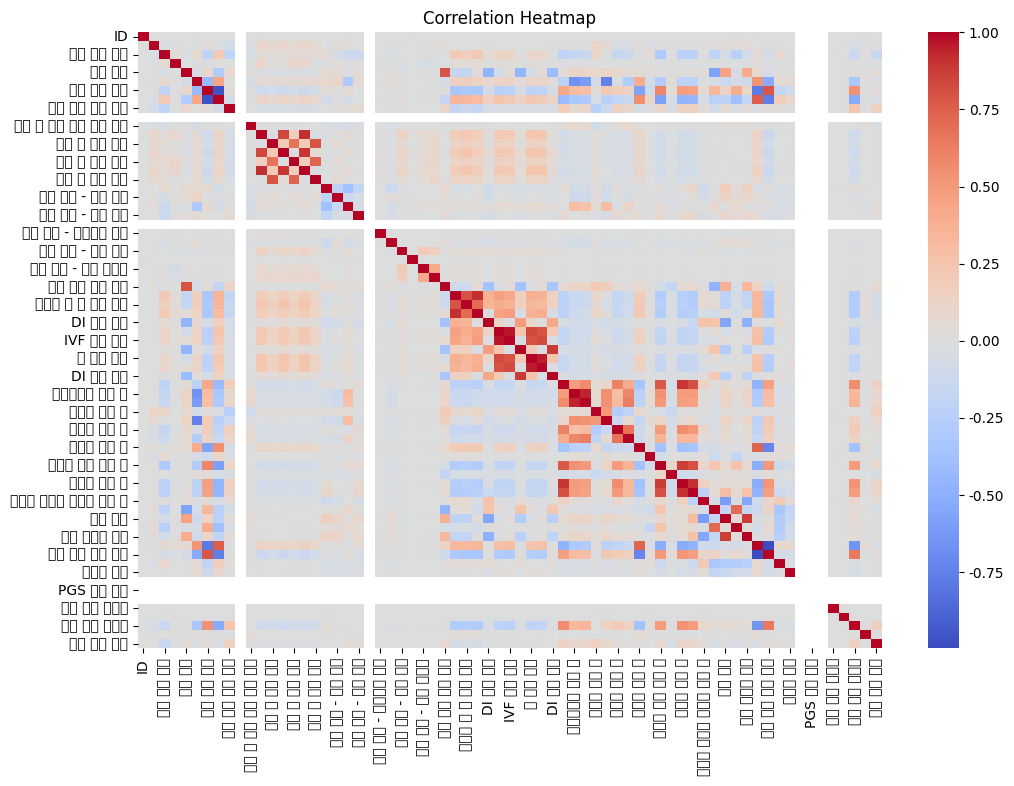

In [ ]:
# 상관계수 계산
corr = train_df.corr()

# 상관관계 히트맵
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()


# 데이터 스케일링
* 모델 학습을 위해 데이터를 정규화하거나 표준화

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(train_df.drop(columns=['임신 성공 여부', 'ID']))


# 모델 학습
* Logistic Regression을 이용해 간단한 베이스라인 모델을 학습

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Feature, Target 분리
X = train_df.drop(columns=['임신 성공 여부', 'ID'])
y = train_df['임신 성공 여부']

# 데이터 분리
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# 평가
y_valid_pred = model.predict_proba(X_valid)[:, 1]
roc_auc = roc_auc_score(y_valid, y_valid_pred)
print(f"ROC-AUC: {roc_auc}")


ROC-AUC: 0.7135299662804186


# 모델 성능 개선

**1. 특징 선택 및 생성**

* 모든 변수를 사용하는 대신, 상관관계가 높은 변수를 중심으로 특징 선택을 진행하거나, 새로운 파생 변수를 생성

In [ ]:
# 상관관계가 높은 변수 선택
selected_features = ['시술 당시 나이', '총 시술 횟수', '이식된 배아 수', '배아 이식 경과일']

X_selected = train_df[selected_features]
y = train_df['임신 성공 여부']

# 데이터 분리
X_train, X_valid, y_train, y_valid = train_test_split(X_selected, y, test_size=0.2, random_state=42)


**2 트리 기반 모델 학습**
* 트리 기반 모델은 비선형 관계를 잘 학습할 수 있음
* RandomForest 또는 XGBoost를 사용

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# RandomForest 모델 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 평가
y_valid_pred_rf = rf_model.predict_proba(X_valid)[:, 1]
roc_auc_rf = roc_auc_score(y_valid, y_valid_pred_rf)
print(f"RandomForest ROC-AUC: {roc_auc_rf}")


RandomForest ROC-AUC: 0.7144562466607416


3. 하이퍼파라미터 튜닝
* GridSearchCV 또는 Optuna를 사용해 모델의 최적 하이퍼파라미터를 탐색

4. 데이터 불균형 처리
* 타겟 데이터가 불균형하므로, SMOTE 등의 기법을 사용하여 데이터를 균형있게 조정

In [ ]:
from imblearn.over_sampling import SMOTE

# SMOTE 적용
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
# 테스트 데이터 예측
test_pred = rf_model.predict_proba(test_df[selected_features])[:, 1]


**5. 최종 예측 및 제출 파일 생성**

In [ ]:
print(sample_submission['probability'].min(), sample_submission['probability'].max())


0.0 0.98


In [ ]:
print(test_df.shape[0])  # 테스트 데이터 행 수
print(sample_submission.shape[0])  # 제출 파일 행 수


90067
90067


In [ ]:
# 테스트 데이터 재로드
test_df = pd.read_csv('test.csv')

# ID 확인
print(test_df['ID'].head())
print(test_df['ID'].dtype)

# 다시 제출 파일 생성
sample_submission = pd.DataFrame({
    'ID': test_df['ID'],
    'probability': test_pred
})

sample_submission.to_csv('submission_final.csv', index=False)


0    TEST_00000
1    TEST_00001
2    TEST_00002
3    TEST_00003
4    TEST_00004
Name: ID, dtype: object
object


In [54]:
# 최종 제출 파일 생성
sample_submission = pd.DataFrame({
    'ID': test_df['ID'],  # 올바른 ID
    'probability': test_pred  # 예측 확률
})

# 제출 파일 저장
sample_submission.to_csv('submission_final.csv', index=False)

# 제출 파일 확인
print(sample_submission.head())
print(sample_submission.columns)
print(sample_submission.shape)


           ID  probability
0  TEST_00000     0.000713
1  TEST_00001     0.001377
2  TEST_00002     0.210162
3  TEST_00003     0.122703
4  TEST_00004     0.395463
Index(['ID', 'probability'], dtype='object')
(90067, 2)
